Import dependencies

In [10]:
pip install visualkeras

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 43.2/43.2 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
%load_ext tensorboard

In [1]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout,Input,Flatten,Dense,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data Augumentation
import visualkeras as vk
import os

check gpu capibility

In [2]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

dataset distribution

In [3]:
batchsize=8

In [4]:
train_datagen= ImageDataGenerator(rescale=1./255, rotation_range=0.2,shear_range=0.2,
    zoom_range=0.2,width_shift_range=0.2,
    height_shift_range=0.2, validation_split=0.2)

train_data= train_datagen.flow_from_directory(r'data\training\train',
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical',subset='training' )

validation_data= train_datagen.flow_from_directory(r'data\training\train',
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical', subset='validation')

Found 61127 images belonging to 2 classes.
Found 15281 images belonging to 2 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(r'data\training\test',
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical')

Found 8490 images belonging to 2 classes.


model design

In [6]:
bmodel = InceptionV3(include_top=False, weights='imagenet', input_tensor=Input(shape=(80,80,3)))
hmodel = bmodel.output
hmodel = Flatten()(hmodel)
hmodel = Dense(64, activation='relu')(hmodel)
hmodel = Dropout(0.5)(hmodel)
hmodel = Dense(2,activation= 'softmax')(hmodel)

model = Model(inputs=bmodel.input, outputs= hmodel)
for layer in bmodel.layers:
    layer.trainable = False

In [7]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 80, 80, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 39, 39, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 39, 39, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 39, 39, 32)   0           ['batch_normalization[0][0]']

 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 7, 7, 32)    96          ['conv2d_11[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_5 (Activation)      (None, 7, 7, 64)     0           ['batch_normalization_5[0][0]']  
                                                                                                  
 activation_7 (Activation)      (None, 7, 7, 64)     0           ['batch_normalization_7[0][0]']  
                                                                                                  
 activation_10 (Activation)     (None, 7, 7, 96)     0           ['batch_normalization_10[0][0]'] 
          

                                                                                                  
 conv2d_23 (Conv2D)             (None, 7, 7, 96)     55296       ['activation_22[0][0]']          
                                                                                                  
 batch_normalization_20 (BatchN  (None, 7, 7, 48)    144         ['conv2d_20[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_23 (BatchN  (None, 7, 7, 96)    288         ['conv2d_23[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_20 (Activation)     (None, 7, 7, 48)     0           ['batch_normalization_20[0][0]'] 
          

 conv2d_34 (Conv2D)             (None, 3, 3, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 3, 3, 128)   384         ['conv2d_34[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_34 (Activation)     (None, 3, 3, 128)    0           ['batch_normalization_34[0][0]'] 
                                                                                                  
 conv2d_35 (Conv2D)             (None, 3, 3, 128)    114688      ['activation_34[0][0]']          
                                                                                                  
 batch_normalization_35 (BatchN  (None, 3, 3, 128)   384         ['conv2d_35[0][0]']              
 ormalizat

 activation_44 (Activation)     (None, 3, 3, 160)    0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 3, 3, 160)    179200      ['activation_44[0][0]']          
                                                                                                  
 batch_normalization_45 (BatchN  (None, 3, 3, 160)   480         ['conv2d_45[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_45 (Activation)     (None, 3, 3, 160)    0           ['batch_normalization_45[0][0]'] 
                                                                                                  
 conv2d_41 (Conv2D)             (None, 3, 3, 160)    122880      ['mixed4[0][0]']                 
          

 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 3, 3, 160)    0           ['batch_normalization_55[0][0]'] 
                                                                                                  
 conv2d_51 (Conv2D)             (None, 3, 3, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_56 (Conv2D)             (None, 3, 3, 160)    179200      ['activation_55[0][0]']          
                                                                                                  
 batch_normalization_51 (BatchN  (None, 3, 3, 160)   480         ['conv2d_51[0][0]']              
 ormalization)                                                                                    
          

                                                                                                  
 conv2d_66 (Conv2D)             (None, 3, 3, 192)    258048      ['activation_65[0][0]']          
                                                                                                  
 batch_normalization_61 (BatchN  (None, 3, 3, 192)   576         ['conv2d_61[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_66 (BatchN  (None, 3, 3, 192)   576         ['conv2d_66[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_61 (Activation)     (None, 3, 3, 192)    0           ['batch_normalization_61[0][0]'] 
          

                                                                                                  
 batch_normalization_74 (BatchN  (None, 3, 3, 192)   576         ['conv2d_74[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_70 (Activation)     (None, 3, 3, 192)    0           ['batch_normalization_70[0][0]'] 
                                                                                                  
 activation_74 (Activation)     (None, 3, 3, 192)    0           ['batch_normalization_74[0][0]'] 
                                                                                                  
 conv2d_71 (Conv2D)             (None, 1, 1, 320)    552960      ['activation_70[0][0]']          
                                                                                                  
 conv2d_75

 activation_82 (Activation)     (None, 1, 1, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 1, 1, 384)    0           ['batch_normalization_83[0][0]'] 
                                                                                                  
 batch_normalization_84 (BatchN  (None, 1, 1, 192)   576         ['conv2d_84[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_76 (Activation)     (None, 1, 1, 320)    0           ['batch_normalization_76[0][0]'] 
                                                                                                  
 mixed9_0 (Concatenate)         (None, 1, 1, 768)    0           ['activation_78[0][0]',          
          

                                                                                                  
 activation_85 (Activation)     (None, 1, 1, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 (Concatenate)         (None, 1, 1, 768)    0           ['activation_87[0][0]',          
                                                                  'activation_88[0][0]']          
                                                                                                  
 concatenate_1 (Concatenate)    (None, 1, 1, 768)    0           ['activation_91[0][0]',          
                                                                  'activation_92[0][0]']          
                                                                                                  
 activation_93 (Activation)     (None, 1, 1, 192)    0           ['batch_normalization_93[0][0]'] 
          

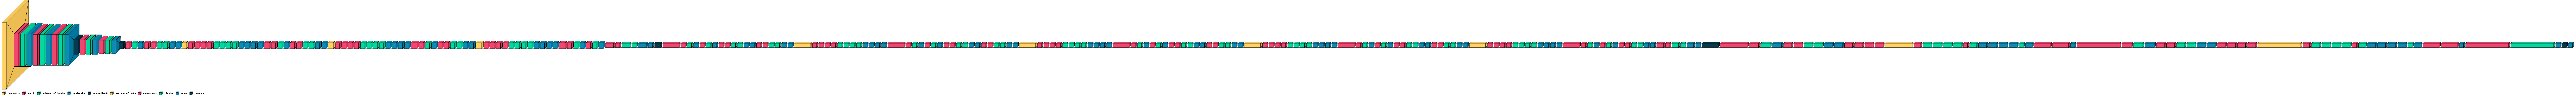

In [8]:
vk.layered_view(model)
vk.layered_view(model, legend=True) # without custom font
from PIL import ImageFont
font = ImageFont.truetype("arial.ttf", 12)
vk.layered_view(model, legend=True)#, font=font) # selected font

training

In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau
import datetime, os

In [10]:
checkpoint = ModelCheckpoint(r'models\model.h5',
                            monitor='val_loss',save_best_only=True,verbose=3)

earlystop = EarlyStopping(monitor = 'val_loss', patience=7, verbose= 3, restore_best_weights=True)

learning_rate = ReduceLROnPlateau(monitor= 'val_loss', patience=3, verbose= 3, )

callbacks=[checkpoint,earlystop,learning_rate]

In [11]:
model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


In [12]:
model.fit_generator(train_data,steps_per_epoch=train_data.samples//batchsize,
                   validation_data=validation_data,
                   validation_steps=validation_data.samples//batchsize,
                   callbacks=[tensorboard_callback],
                    epochs=5)

C:\Users\sheik\AppData\Local\Temp\ipykernel_7924\535060015.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_data,steps_per_epoch=train_data.samples//batchsize,


Epoch 1/5
7640/7640 [==============================] - 366s 47ms/step - loss: 0.2104 - accuracy: 0.9177 - val_loss: 0.2151 - val_accuracy: 0.9081
Epoch 2/5
7640/7640 [==============================] - 335s 44ms/step - loss: 0.1804 - accuracy: 0.9293 - val_loss: 0.2148 - val_accuracy: 0.9128
Epoch 3/5
7640/7640 [==============================] - 346s 45ms/step - loss: 0.1721 - accuracy: 0.9347 - val_loss: 0.2056 - val_accuracy: 0.9188
Epoch 4/5
7640/7640 [==============================] - 356s 47ms/step - loss: 0.1674 - accuracy: 0.9358 - val_loss: 0.1995 - val_accuracy: 0.9190
Epoch 5/5
7640/7640 [==============================] - 355s 47ms/step - loss: 0.1613 - accuracy: 0.9386 - val_loss: 0.1931 - val_accuracy: 0.9240


In [14]:

version = 1
export_path = os.path.join(r'models\model', str(version))
print('export_path = {}\n'.format(export_path))

tf.keras.models.save_model(
    model,
    export_path,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)

export_path = models\model\1



INFO:tensorflow:Assets written to: models\model\1\assets


INFO:tensorflow:Assets written to: models\model\1\assets


In [9]:
%tensorboard --logdir=logs/fit/ --port 8880


model evaluation

In [21]:
acc_tr, loss_tr = model.evaluate_generator(train_data)
print(acc_tr)
print(loss_tr)

C:\Users\sheik\AppData\Local\Temp\ipykernel_8744\713691994.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc_tr, loss_tr = model.evaluate_generator(train_data)


0.1453934758901596
0.9429875612258911


In [22]:
acc_vr, loss_vr = model.evaluate_generator(validation_data)
print(acc_vr)
print(loss_vr)

C:\Users\sheik\AppData\Local\Temp\ipykernel_8744\4081756742.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc_vr, loss_vr = model.evaluate_generator(validation_data)


0.200040802359581
0.9223873019218445


In [23]:
acc_test, loss_test = model.evaluate_generator(test_data)
print(acc_tr)
print(loss_tr)

C:\Users\sheik\AppData\Local\Temp\ipykernel_8744\3655471885.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc_test, loss_test = model.evaluate_generator(test_data)


0.1453934758901596
0.9429875612258911
